<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.601921,33.626352,61.870218,-0.131447,172.967044,173.086737,-0.119693
1,0.0,1.0,55.727924,44.022559,27.843639,0.058967,137.653089,137.581948,0.071141
2,0.0,2.0,79.386395,70.494785,70.996192,0.010482,230.887854,230.873363,0.014491
3,0.0,3.0,58.770953,82.930575,31.296734,0.025964,183.024226,182.994721,0.029505
4,0.0,4.0,66.748775,36.721642,79.399343,0.074215,192.943976,192.861010,0.082966
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,76.942207,49.304040,75.397621,0.007281,211.651149,211.646223,0.004926
59996,999.0,56.0,96.365032,34.360884,23.212963,-0.092666,163.846214,163.938564,-0.092350
59997,999.0,57.0,62.865910,94.197008,95.040590,-0.017109,262.086398,262.099488,-0.013090
59998,999.0,58.0,34.015983,50.001077,75.396490,0.004136,169.417686,169.426001,-0.008315


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    67.601921  33.626352  61.870218 -0.131447  172.967044   
      1.0    55.727924  44.022559  27.843639  0.058967  137.653089   
      2.0    79.386395  70.494785  70.996192  0.010482  230.887854   
      3.0    58.770953  82.930575  31.296734  0.025964  183.024226   
      4.0    66.748775  36.721642  79.399343  0.074215  192.943976   
...                ...        ...        ...       ...         ...   
999.0 55.0   76.942207  49.304040  75.397621  0.007281  211.651149   
      56.0   96.365032  34.360884  23.212963 -0.092666  163.846214   
      57.0   62.865910  94.197008  95.040590 -0.017109  262.086398   
      58.0   34.015983  50.001077  75.396490  0.004136  169.417686   
      59.0   25.985996  31.338950  99.167860  0.000772  166.493579   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.086737 -0.119693  
      1.0    137.581948  0.071141  
      2.0    230.873363  0.014491  
      3.0    182.994721  0.029505  
      4.0    192.861010  0.082966  
...                 ...       ...  
999.0 55.0   211.646223  0.004926  
      56.0   163.938564 -0.092350  
      57.0   262.099488 -0.013090  
      58.0   169.426001 -0.008315  
      59.0   166.512114 -0.018535  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    67.601921  33.626352  61.870218 -0.131447  172.967044   
      1.0    55.727924  44.022559  27.843639  0.058967  137.653089   
      2.0    79.386395  70.494785  70.996192  0.010482  230.887854   
      3.0    58.770953  82.930575  31.296734  0.025964  183.024226   
      4.0    66.748775  36.721642  79.399343  0.074215  192.943976   
...                ...        ...        ...       ...         ...   
999.0 55.0   76.942207  49.304040  75.397621  0.007281  211.651149   
      56.0   96.365032  34.360884  23.212963 -0.092666  163.846214   
      57.0   62.865910  94.197008  95.040590 -0.017109  262.086398   
      58.0   34.015983  50.001077  75.396490  0.004136  169.417686   
      59.0   25.985996  31.338950  99.167860  0.000772  166.493579   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.086737 -0.119693  
      1.0    137.581948  0.071141  
      2.0    230.873363  0.014491  
      3.0    182.994721  0.029505  
      4.0    192.861010  0.082966  
...                 ...       ...  
999.0 55.0   211.646223  0.004926  
      56.0   163.938564 -0.092350  
      57.0   262.099488 -0.013090  
      58.0   169.426001 -0.008315  
      59.0   166.512114 -0.018535  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.601921,33.626352,61.870218,-0.131447,172.967044,173.086737,-0.119693
1,0.0,1.0,55.727924,44.022559,27.843639,0.058967,137.653089,137.581948,0.071141
2,0.0,2.0,79.386395,70.494785,70.996192,0.010482,230.887854,230.873363,0.014491
3,0.0,3.0,58.770953,82.930575,31.296734,0.025964,183.024226,182.994721,0.029505
4,0.0,4.0,66.748775,36.721642,79.399343,0.074215,192.943976,192.861010,0.082966
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,76.942207,49.304040,75.397621,0.007281,211.651149,211.646223,0.004926
59996,999.0,56.0,96.365032,34.360884,23.212963,-0.092666,163.846214,163.938564,-0.092350
59997,999.0,57.0,62.865910,94.197008,95.040590,-0.017109,262.086398,262.099488,-0.013090
59998,999.0,58.0,34.015983,50.001077,75.396490,0.004136,169.417686,169.426001,-0.008315


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    67.601921  33.626352  61.870218 -0.131447  172.967044   
      1.0    55.727924  44.022559  27.843639  0.058967  137.653089   
      2.0    79.386395  70.494785  70.996192  0.010482  230.887854   
      3.0    58.770953  82.930575  31.296734  0.025964  183.024226   
      4.0    66.748775  36.721642  79.399343  0.074215  192.943976   
...                ...        ...        ...       ...         ...   
999.0 55.0   76.942207  49.304040  75.397621  0.007281  211.651149   
      56.0   96.365032  34.360884  23.212963 -0.092666  163.846214   
      57.0   62.865910  94.197008  95.040590 -0.017109  262.086398   
      58.0   34.015983  50.001077  75.396490  0.004136  169.417686   
      59.0   25.985996  31.338950  99.167860  0.000772  166.493579   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.086737 -0.119693  
      1.0    137.581948  0.071141  
      2.0    230.873363  0.014491  
      3.0    182.994721  0.029505  
      4.0    192.861010  0.082966  
...                 ...       ...  
999.0 55.0   211.646223  0.004926  
      56.0   163.938564 -0.092350  
      57.0   262.099488 -0.013090  
      58.0   169.426001 -0.008315  
      59.0   166.512114 -0.018535  

[60000 rows x 7 columns]

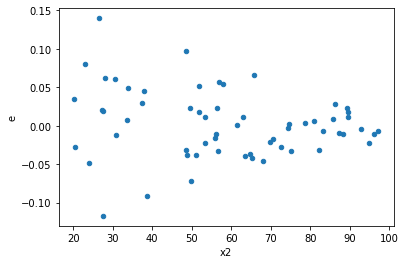

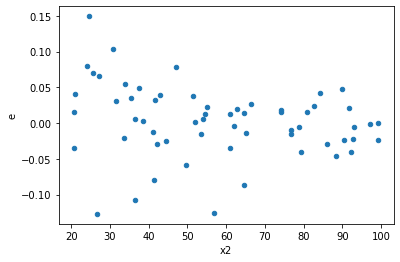

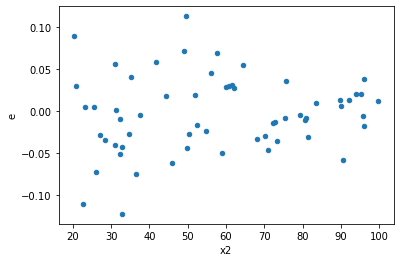

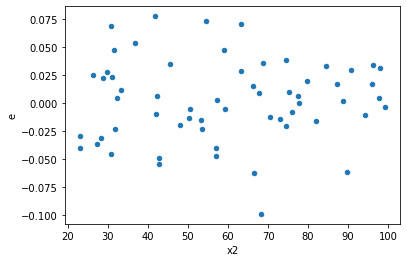

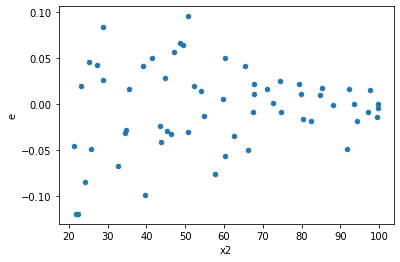

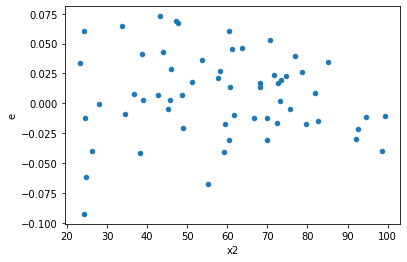

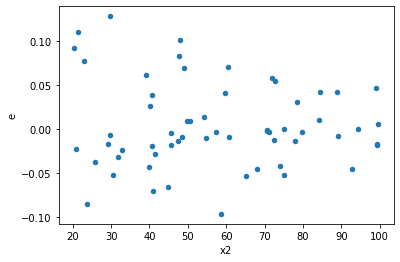

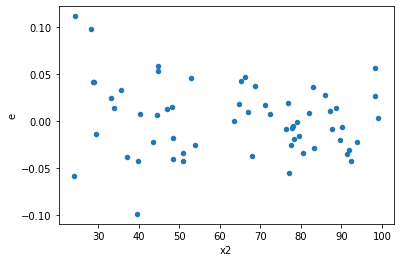

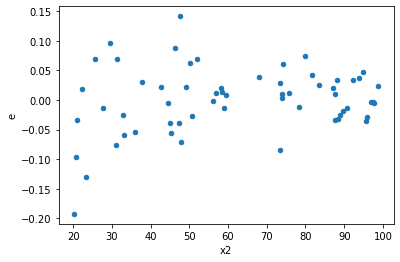

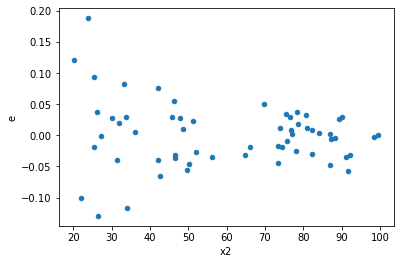

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,30.0,24.0,0.03907609803782653,0.07314783135649268,0.0013025366012608844,0.003047826306520528,2.339916055771611,0.03594026403504724,0.9820298679824764,0.01797013201752362,Reject005=0 : Heteroscedasticity
5.0,23.0,31.0,0.026129518716547243,0.07046147475155937,0.0011360660311542279,0.002272950798437399,2.0007206765333096,0.0722608357918717,0.9638695821040641,0.03613041789593585,Reject005=1 : Homoscedasticity
7.0,26.0,28.0,0.04414405310361093,0.0561001170749034,0.001697848196292728,0.0020035756098179787,1.1800675785931924,0.6665537754976802,0.6667231122511599,0.3332768877488401,Reject005=1 : Homoscedasticity
9.0,20.0,34.0,0.015525481208177599,0.13691199474305238,0.0007762740604088799,0.004026823374795659,5.18737335197655,2.7157081150974705e-05,0.9999864214594245,1.3578540575487352e-05,Reject005=0 : Heteroscedasticity
11.0,28.0,26.0,0.059955914543269935,0.0666776760822766,0.0021412826622596404,0.0025645260031644844,1.197658790389778,0.6466874284187112,0.6766562857906444,0.3233437142093556,Reject005=1 : Homoscedasticity
16.0,26.0,28.0,0.03537861662639748,0.09478363572724255,0.0013607160240922107,0.00338512984740152,2.487756289678354,0.020167432776836636,0.9899162836115817,0.010083716388418318,Reject005=0 : Heteroscedasticity
17.0,25.0,29.0,0.02328573310633538,0.04875326933221895,0.0009314293242534152,0.0016811472183523774,1.804911198925261,0.12711512720745577,0.9364424363962721,0.06355756360372788,Reject005=1 : Homoscedasticity
21.0,28.0,26.0,0.030704261405246583,0.047534498160550394,0.0010965807644730922,0.0018282499292519383,1.667227794325221,0.19391105771660433,0.9030444711416978,0.09695552885830216,Reject005=1 : Homoscedasticity
26.0,31.0,23.0,0.03795455605232995,0.07487350060896893,0.0012243405178170952,0.0032553695916943013,2.658875977982314,0.017802950195843437,0.9910985249020783,0.008901475097921718,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,30.0,24.0,0.03907609803782653,0.07314783135649268,0.0013025366012608844,0.003047826306520528,2.339916055771611,0.03594026403504724,Reject005=0 : Heteroscedasticity
1.0,27.0,27.0,0.059803888999072824,0.05097403292655676,0.002214958851817512,0.001887927145428028,0.8523531459191064,0.6810628514950212,Reject005=1 : Homoscedasticity
2.0,25.0,29.0,0.103809162893607,0.016629188247657786,0.00415236651574428,0.0005734202844019927,0.1380948146623833,3.4713048165870076e-06,Reject005=0 : Heteroscedasticity
3.0,31.0,23.0,0.046607507932036794,0.027822161948432796,0.0015034679978076385,0.001209659215149252,0.8045792906222019,0.5651263744158096,Reject005=1 : Homoscedasticity
4.0,26.0,28.0,0.048032659621046817,0.04397725625617553,0.0018474099854248775,0.0015706162948634118,0.8501720285452462,0.6802559474811765,Reject005=1 : Homoscedasticity
5.0,23.0,31.0,0.026129518716547243,0.07046147475155937,0.0011360660311542279,0.002272950798437399,2.0007206765333096,0.0722608357918717,Reject005=1 : Homoscedasticity
6.0,29.0,25.0,0.057880664058768086,0.01674131785171149,0.0019958849675437273,0.0006696527140684597,0.3355166880647336,0.005378105691714733,Reject005=0 : Heteroscedasticity
7.0,26.0,28.0,0.04414405310361093,0.0561001170749034,0.001697848196292728,0.0020035756098179787,1.1800675785931924,0.6665537754976802,Reject005=1 : Homoscedasticity
8.0,27.0,27.0,0.07507419853260892,0.023141397975374806,0.002780525871578108,0.0008570888139027706,0.30824701998414544,0.003188547920609365,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      589
Reject005=0 : Heteroscedasticity    411
Name: Result_test, dtype: int64